# Chicago Crime Map

In this notebook we'll continue analysing our Chicago crime dataset, but with a focus on the crime locations and different ways of visualising geographic data. We're going to be using [Matplotlib Basemap](https://matplotlib.org/basemap/).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # a new dependency

Read the data just like in the previous section

In [2]:
crimes_file_path = 'data/chicago_crime/crimes.csv.gzip'
# parsing weather data and make sure we're reading in just the 2016 data
crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True, compression='gzip')['2016']
crimes2016.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,10956651,JA277470,027XX N PULASKI RD,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,2524,...,30.0,22.0,06,1149253.0,1917891.0,2016,02/10/2018 03:50:01 PM,41.930619,-87.726946,"(41.930619258, -87.726946235)"
2016-01-01,10478256,HZ217384,030XX N HAMLIN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,2523,...,30.0,21.0,20,1150761.0,1919927.0,2016,02/10/2018 03:50:01 PM,41.936177,-87.721351,"(41.936176812, -87.721351222)"
2016-01-01,10479192,HZ218038,012XX S PRAIRIE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,132,...,2.0,33.0,11,1178107.0,1894643.0,2016,02/10/2018 03:50:01 PM,41.866217,-87.621624,"(41.866216769, -87.621623622)"
2016-01-01,10654040,HZ403662,053XX W CHICAGO AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,1524,...,37.0,25.0,06,1140387.0,1904812.0,2016,02/10/2018 03:50:01 PM,41.894896,-87.759849,"(41.894896457, -87.759848588)"
2016-01-01,11061033,JA394658,110XX S STATE ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,513,...,34.0,49.0,02,1178209.0,1831939.0,2016,02/10/2018 03:50:01 PM,41.694148,-87.623150,"(41.694148281, -87.623150288)"


For every crime incident, we are interested in the latitude and longitude values – the geographic location of the crime.

In [3]:
crimes2016[:5].loc[:, ['Latitude', 'Longitude']]

,Latitude,Longitude
Date,,
2016-01-01,41.930619,-87.726946
2016-01-01,41.936177,-87.721351
2016-01-01,41.866217,-87.621624
2016-01-01,41.894896,-87.759849
2016-01-01,41.694148,-87.623150


## Basemap

Let us first show how Matplotlib Basemap can be used for working with spatial data. Basemap doesn't require any external APIs (though as we'll show ArcGIS can be used for fetching more detailed map tiles).

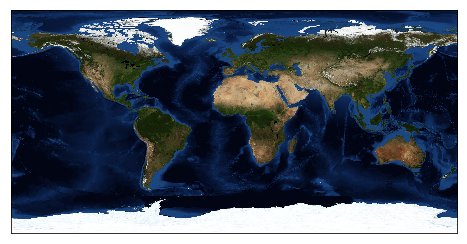

In [8]:
plt.figure(figsize=(8, 8))
m = Basemap()
m.bluemarble(scale=0.5)
plt.show()

Basesemap has lots of projections. For a full list see [the docs](https://matplotlib.org/basemap/users/mapsetup.html).

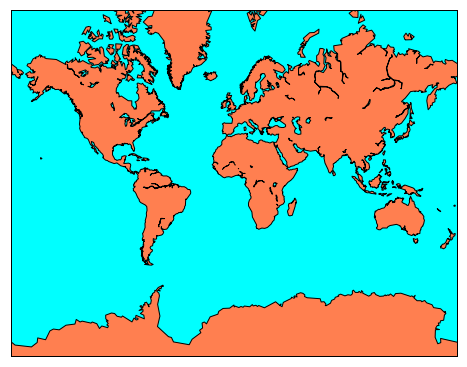

In [14]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
plt.show()

## Zooming in

Let's zoom into Chicago… Google Maps is useful for getting the exact latitude and longitude coordinates of certain points (e.g. the corners of a frame of the map we want to show)

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=271135.03996665304,506586.80946384603,426261.3796491339,646105.8783783929&bboxSR=2790&imageSR=2790&size=2000,1798&dpi=96&format=png32&f=image


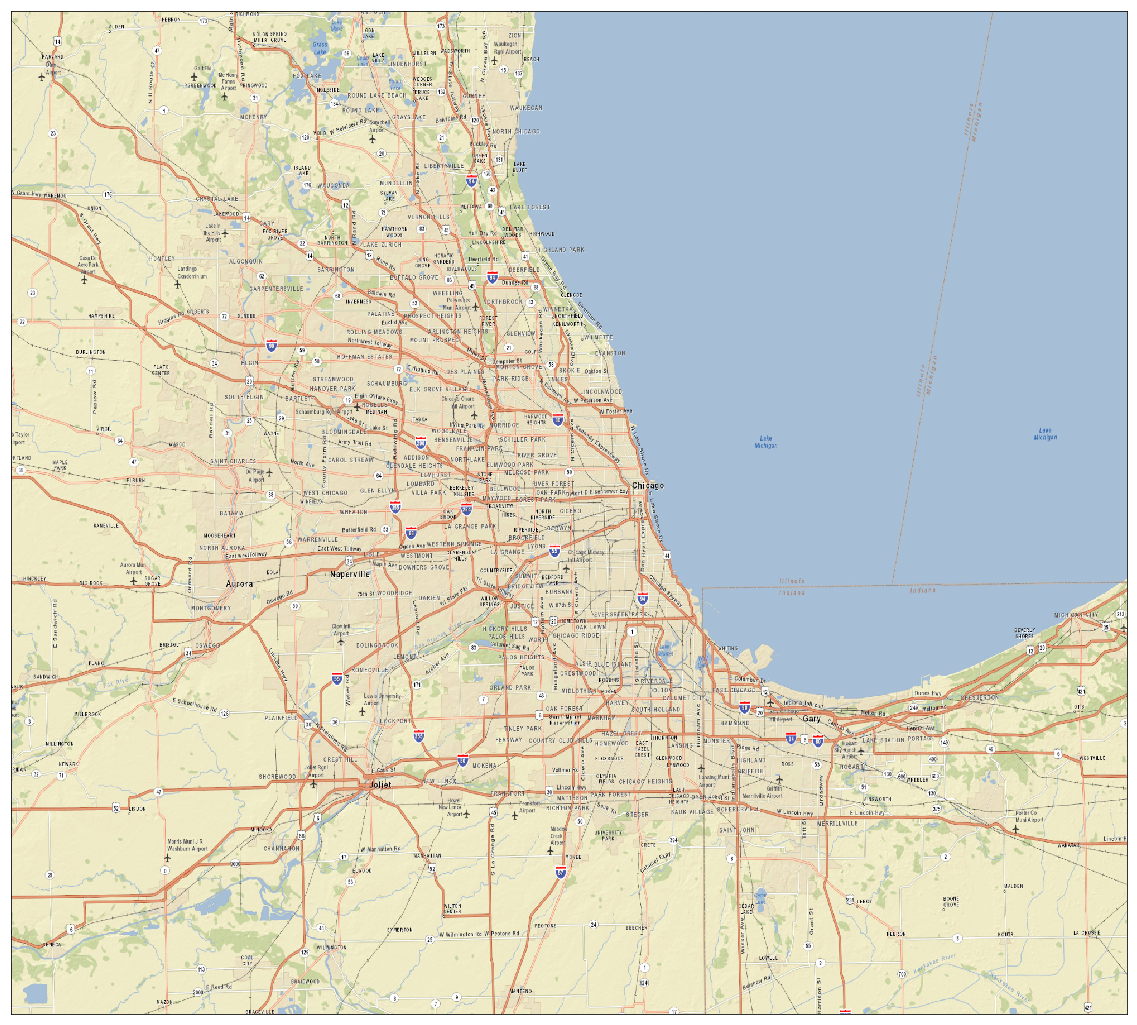

In [67]:
# 41.229510, -88.677617 - lower left
# 42.475900, -86.797856 - upper right

fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc',
            llcrnrlat=41.229510, llcrnrlon=-88.677617, # lower left
            urcrnrlat=42.475900, urcrnrlon=-86.797856, # upper right
            lat_ts=41.5, # latitude of true scale
            resolution='l', # full resolution
            epsg=2790) # the EPSG code for East Illinois obtained from http://spatialreference.org/

x, y = m(-88, 41.5) # lon, lat <- be careful, the order is a bit odd!
#m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
# m.etopo(scale=0.5, alpha=0.5)

# this method uses the ArcGIS API to download the map tiles and place them correctly
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)

plt.show()

## Overlaying spatial information

Now we can plot additional data onto the graph, like points on some coordinates.

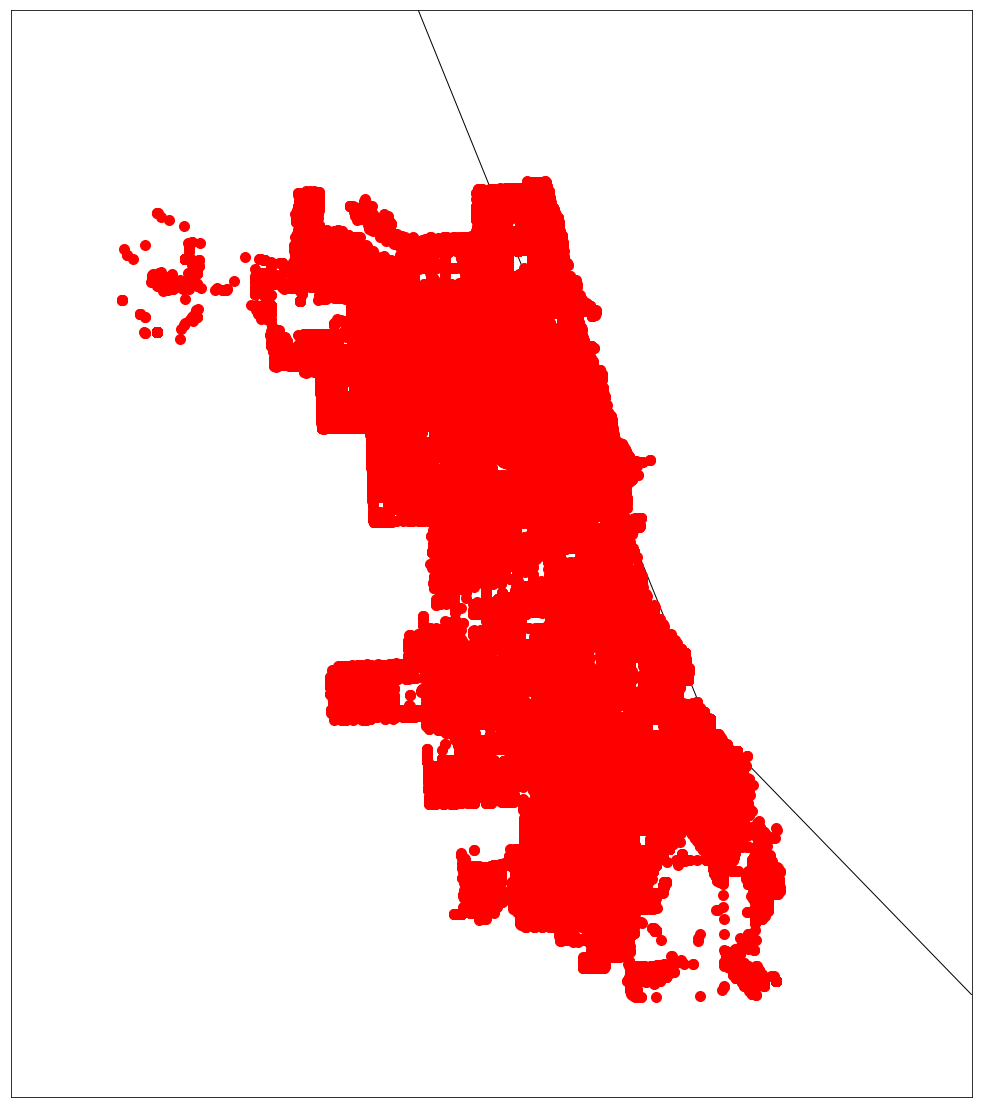

In [151]:
def plot_map(xpixels=200):
    """a convenient function for rendering the map, so that we can iterate more quickly"""
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(projection='merc',
                urcrnrlat=42.1, urcrnrlon=-87.4, # upper right
                llcrnrlat=41.6, llcrnrlon=-88., # lower left
                lat_ts=42, # latitude of true scale
                resolution='l', # full resolution
                epsg=2790) # the EPSG code for East Illinois obtained from http://spatialreference.org/

    x, y = m(-88, 41.5) # lon, lat <- be careful, the order is a bit odd!
    #m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = xpixels, verbose= True) # keeping a lower resolution to speed up teh image download
    m.drawcoastlines()
    return m

m = plot_map()
# plot an example point
m.plot(x, y, "ro", markersize=10)

plt.show()

Now let's remind ourselves what spatial information do we have in our crimes dataset.

In [75]:
crimes2016.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [78]:
crimes2016['Latitude'][:5]

Date
2016-01-01    41.930619
2016-01-01    41.936177
2016-01-01    41.866217
2016-01-01    41.894896
2016-01-01    41.694148
Name: Latitude, dtype: float64

In [79]:
crimes2016['Longitude'][:5]

Date
2016-01-01   -87.726946
2016-01-01   -87.721351
2016-01-01   -87.621624
2016-01-01   -87.759849
2016-01-01   -87.623150
Name: Longitude, dtype: float64

This is how we can plot that information on the map.

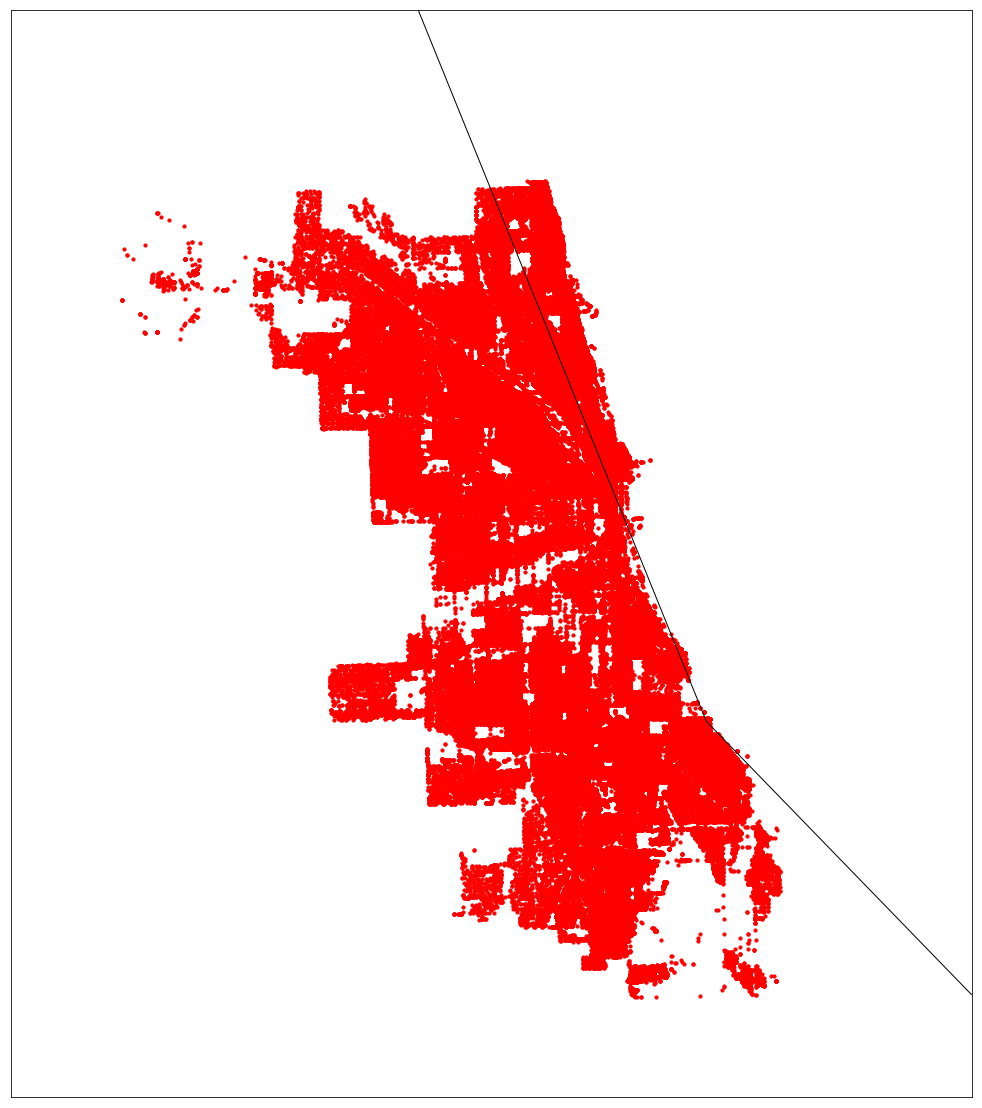

In [152]:
m = plot_map()

# we can limit the number of points
# n = 100
# lons = crimes2016['Longitude'][:n].values
# lats = crimes2016['Latitude'][:n].values

lons = crimes2016['Longitude'].values
lats = crimes2016['Latitude'].values
x, y = m(lons,lats)
m.scatter(x, y, 10, marker='o', color='r')

plt.show()

That's a lot of data points. Let's see if filtering by type would give us some more insightful views.

In [156]:
crimes_mi = crimes2016.set_index(['Primary Type'], append=True)
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int)
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum()
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,4,21,2,0,24,24,0,46,0,...,0,11,0,0,0,1,34,0,19,2
2016-01-01 01:00:00,0,3,22,2,0,2,6,1,1,0,...,0,0,0,0,0,3,2,0,10,0
2016-01-01 02:00:00,0,5,29,0,0,0,9,0,3,0,...,0,1,0,0,1,1,0,0,11,1
2016-01-01 03:00:00,1,3,21,1,0,0,4,0,4,0,...,0,2,0,0,0,2,0,0,4,1
2016-01-01 04:00:00,0,1,11,0,0,1,5,0,4,0,...,0,1,0,0,0,1,0,0,6,0


In [160]:
from ipywidgets import interact

@interact(crime_type = crimes_by_type.columns)
def plot_map_and_data(crime_type='THEFT'):
    m = plot_map()

    lons = crimes2016[crimes2016['Primary Type'] == crime_type]['Longitude'].values
    lats = crimes2016[crimes2016['Primary Type'] == crime_type]['Latitude'].values
    x, y = m(lons,lats)
    m.scatter(x, y, 10, marker='o', color='r')

interactive(children=(Dropdown(description='crime_type', index=31, options=('ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'), value='THEFT'), Output()), _dom_classes=('widget-interact',))

As a homework assignment, try making a similar selector for choosing the season (spring, summer, autumn, winter) and see if that gives us some more useful insights.